# Aprendizaje Computacional  

## Mario Graff (mgraffg@ieee.org, mario.graff@infotec.mx)  
## [https://github.com/ingeotec](https://github.com/ingeotec)
## [https://github.com/mgraffg](https://github.com/mgraffg)
## CONACYT - INFOTEC  

# Temas

1. Introducción
2. Aprendizaje supervisado
3. Métodos paramétricos
4. Métodos no-paramétricos
5. Máquinas de kernel
6. Métodos no convencionales de aprendizaje
7. Diseño y análisis de experimentos de aprendizaje
8. Aplicaciones

# Programación Genética

* Algoritmo evolutivo
* Principios de la selección natural
* Supervivencia del mas apto
* Algoritmo poblacional

# Pseudocódigo - Evolución estado estable

```python    
P = create_initial_population()
while not stopping_criteria(P):
    father1 = tournament_selection(P)
    if p_mutation < random():
        son = mutation(father1)
    else:
        father2 = tournament_selection(P)
        son = crossover(father1, father2)
    kill = negative_tournament_selection(P)
    P[kill] = son
```

# Busca en un espacio de programas

* Espacio de funciones $\Omega$ 
* $\Omega$ creado recursivamente por:
* Conjunto de funciones $\mathcal F$
* Conjunto de terminales $\mathcal L$

* $\mathcal F$ compuesto por suma, multiplicación, división, entre otras
* $\mathcal L$ variables independientes, entradas. 

* Cada función en $\mathcal F$ está asociada con un conjunto de parámetros
* $f \in \mathcal F$ tiene cardinalidad $1$ entonces $f(x \mid \theta) \in \Omega$ 

* $\theta$ se identifica utilizando $\mathcal X$ mediante mínimos cuadrados

# Espacio de Búsqueda

* $\mathcal F_c \subseteq \mathcal F$
* $\Omega^i$ elementos creados en la iteración $i$, empezando por $i=0$
* $\Omega^0 = \{ \theta x_i \mid x_i \in \mathcal L \} \cup \bigcup_c \{ f(x_1, \cdots, x_c \mid \theta) \mid x_i \in \mathcal{L}, f \in \mathcal{F}_c \}$
* $\Omega^i = \bigcup_c \{ f(x_1, \cdots, x_c \mid \theta) \mid x_i \in \Omega^{i-1}, f \in \mathcal{F}_c \}$

* $\Omega = \bigcup_i \Omega^i$

* Funciones conmutativas
* $f(a, b, b, d) = \theta f(a, b, d)$

# EvoDAG

* Muestrea $\Omega^i$ mediante una población $\mathcal P$
* $P^0$ contiene $\{\theta x \mid x \in \mathcal L\}$
* $P^0$ además contiene funciones especiales como:   
   Nearest Centroid Classifier, Bayes Ingenuo, entre otras
* $P^0$ se completa seleccionado $f \in \mathcal F$ y sus argumentos de $\mathcal L$ sin reemplazo
* Si $\mathcal L$ está vacío y $P^0$ no tiene el número de elementos deseados
* Se selecciona $f \in \mathcal F$ y sus argumentos de $P^0$

# Ejemplo

* $\mathcal F = \{+, \sin \}$
* $\mathcal L =\{x_1, x_2, x_3\}$
* $\mathcal P^0$ empieza con $\{\theta_1 x_1, \theta_2 x_3, \theta_3 x_2\}$
* $+$ $\rightarrow$ $P^0 = \{\theta_1 x_1, \theta_2 x_3, \theta_3 x_2, \theta_4 x_1 + \theta_5 x_2\}$
* $\sin$ $\rightarrow$ $P^0=\{\theta_1 x_1, \theta_2 x_3, \theta_3 x_2, \theta_4 x_1 + \theta_5 x_3, \theta_6 \sin{(x_2)}\}$

* $\sin$ argumento $\theta_4 x_1 + \theta_5 x_3$ $\rightarrow$ $P^0=\{\theta_1 x_1, \theta_2 x_3, \theta_3 x_2, \theta_4 x_1 + \theta_5 x_3, \theta_6 \sin{(x_2)}, \theta_7 \sin{(\theta_4 x_1 + \theta_5 x_3)}\}$

# EvoDAG - Evolución

* Una vez creado $P^0$ 
* $P = P^0$
* Se genera un hijo $s$ seleccionando $f \in \mathcal F$ y sus argumentos se toman de $P$
* Se selecciona $j \in P$ utilizando un torneo negativo
* $j$ es reemplazado por $s$

* $P=\{\theta_1 x_1, \theta_2 x_3, \theta_3 x_2, \theta_4 x_1 + \theta_5 x_3, \theta_6 \sin{(x_2)}, \theta_7 \sin{(\theta_4 x_1 + \theta_5 x_3)}\}$
* $+$
* $\theta_3 x_2 + \theta_6 \sin{(x_2)}$
* $P=\{\theta_3 x_2 + \theta_6 \sin{(x_2)}, \theta_2 x_3, \theta_3 x_2, \theta_4 x_1 + \theta_5 x_3, \theta_6 \sin{(x_2)}, \theta_7 \sin{(\theta_4 x_1 + \theta_5 x_3)}\}$

# Criterio de Paro

* Se usa la técnica de _early stopping_
* $\mathcal X$ se divide en $\mathcal X$ y $\mathcal V$
* $\mathcal X$ se usa para guiar la búsqueda
* $\mathcal V$ mide la generalización del modelo
* El modelo final es el que mejor rendimiento tiene en $\mathcal V$
* Detienen cuando en $k$ evaluaciones no se obtiene un mejor rendimiento en $\mathcal V$

# Selección por torneo

* Seleccionan $k$ individuos
* Se escoge al que mejor rendimiento tenga

```python  
shuffle(P)
p = P[:k]
fit = [(x, fitness(x)) for x in p]
fit.sort(key=lambda x: x[0])
winner = fit[-1]```

* Torneo negativo


```python  
loser = fit[0]```

# EvoDAG - pseudocódigo

```python    
P = create_initial_population()
while not stopping_criteria(P):
    func = select_function()
    args = [tournament_selection(P) for _ in nargs(func)]
    son = func(*args)
    kill = negative_tournament_selection(P)
    P[kill] = son
```

# EvoDAG Model
![EvoDAG.png](EvoDAG.png)

In [1]:
%pylab inline
from sklearn.datasets import make_blobs
import numpy as np
def boundary(x, y, m):
    px = []
    py = []
    for y0 in y:
        pr = m.predict(np.vstack((x, [y0] * x.shape[0])).T)
        df = np.fabs(pr[1:] - pr[:-1])
        step = np.where(df > 0)[0]
        if len(step):
            for x0 in step:
                py.append(y0)
                px.append(x[x0])
    return px, py

Populating the interactive namespace from numpy and matplotlib


# Problema binario

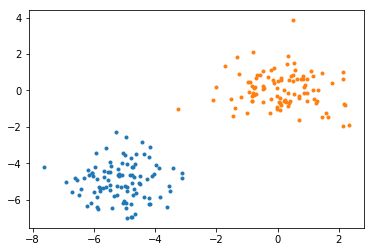

In [5]:
centers = [(-5, -5), (0, 0)]
X, y = make_blobs(n_samples=200, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
for k in np.unique(y):
    pylab.plot(X[y == k, 0], X[y == k, 1], '.')

# EvoDAG - Función de Decisión

100%|██████████| 30/30 [00:01<00:00, 27.06it/s]


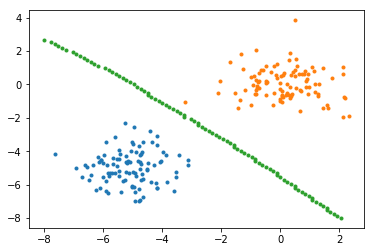

In [8]:
from sklearn.svm import LinearSVC
from EvoDAG.model import EvoDAGE
import numpy as np
for k in np.unique(y):
    pylab.plot(X[y == k, 0], X[y == k, 1], '.')
m = EvoDAGE().fit(X, y)
px, py = boundary(np.linspace(-8, 4, 100), np.linspace(-8, 4, 100), m)
_ = pylab.plot(px, py, '.')

# Problema

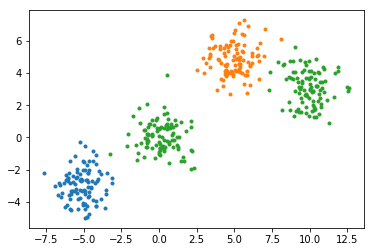

In [14]:
centers = [(-5, -3), (0, 0), (5, 5), (10, 3)]
X, y = make_blobs(n_samples=400, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
y[100:200] = 3
for k in np.unique(y):
    pylab.plot(X[y == k, 0], X[y == k, 1], '.')

# EvoDAG - Función de Decisión

100%|██████████| 30/30 [00:14<00:00,  1.27it/s]


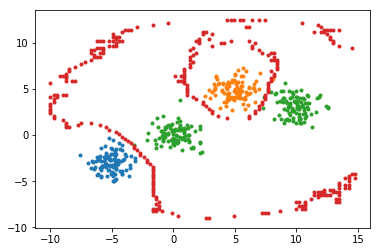

In [16]:
from sklearn.svm import LinearSVC
from EvoDAG.model import EvoDAGE
import numpy as np
for k in np.unique(y):
    pylab.plot(X[y == k, 0], X[y == k, 1], '.')
m = EvoDAGE().fit(X, y)
px, py = boundary(np.linspace(-10, 15, 100), np.linspace(-10, 15, 100), m)
_ = pylab.plot(px, py, '.')

# EvoDAG - Model

In [31]:
import graphviz
model = m.models[2]
model.graphviz('model0.gv')

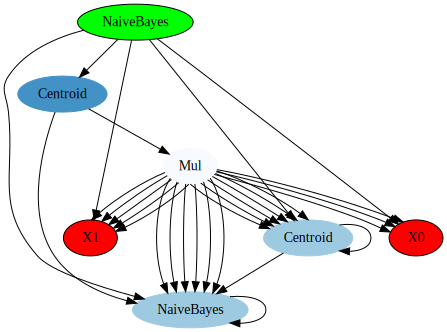

In [42]:
data = open('model0.gv').read()
graph = graphviz.Source(data)
graph

# Model - Función de Decisión

100%|██████████| 30/30 [00:15<00:00,  1.29it/s]


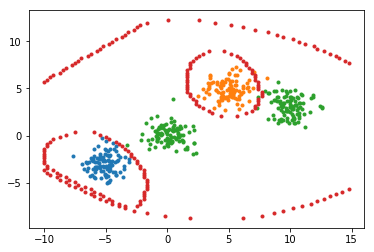

In [38]:
for k in np.unique(y):
    pylab.plot(X[y == k, 0], X[y == k, 1], '.')
px, py = boundary(np.linspace(-10, 15, 100), np.linspace(-10, 15, 100), model)
_ = pylab.plot(px, py, '.')

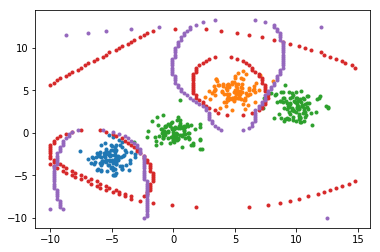

In [40]:
for k in np.unique(y):
    pylab.plot(X[y == k, 0], X[y == k, 1], '.')
px, py = boundary(np.linspace(-10, 15, 100), np.linspace(-10, 15, 100), model)
_ = pylab.plot(px, py, '.')
px, py = boundary(np.linspace(-10, 15, 100), np.linspace(-10, 15, 100), m.models[0])
_ = pylab.plot(px, py, '.')